# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
#url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = '{}appid={}&units=imperial&q='.format(base_url, weather_api_key)
print(query_url)




http://api.openweathermap.org/data/2.5/weather?appid=5b37cbace6e59d8bb8b7c45c4045c5f3&units=imperial&q=


In [11]:
#test
response = requests.get(query_url + "sacramento").json()
print(response)

{'coord': {'lon': -121.32, 'lat': 38.47}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 51.44, 'feels_like': 48.27, 'temp_min': 50, 'temp_max': 53.01, 'pressure': 1022, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 140}, 'clouds': {'all': 1}, 'dt': 1605339206, 'sys': {'type': 1, 'id': 5769, 'country': 'US', 'sunrise': 1605278737, 'sunset': 1605315235}, 'timezone': -28800, 'id': 5389519, 'name': 'Sacramento', 'cod': 200}


In [13]:
#ask for help - something in data is wrong. need a new approach.

#print banner and lashes
#this is not included in data
print("Beginning Data Retrival")
print("-----------------------------")

#create empty lists for each field needed from raw data

record_number = 0
city_list = []
country = []
cloudiness = []
date = []
humidity = []
lat	= []
lng	= []
temp_max = []
wind_speed = []

#print log of each city - city number and city name

for city in cities:
    response = requests.get(query_url + city).json()
    try:
        city_list.append(response['name'])

        country.append(response['sys']['country'])
        
        cloudiness.append(response['clouds']['all'])
        
        date.append(response['dt'])
        
        humidity.append(response['main']['humidity'])
        
        lat.append(response['coord']['lat'])
        
        lng.append(response['coord']['lon'])
        
        temp_max.append(response['main']['temp_max'])
        
        wind_speed.append(response['wind']['speed'])
        
        record_number += 1
        print("Processing Record {} | {}".format(record_number, city))
    except:
        record_number += 1
        print("City not found. Skipping ...".format(record_number))
        pass

#end
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")



Beginning Data Retrival
-----------------------------
Processing Record 1 | dingle
Processing Record 2 | saint-philippe
Processing Record 3 | clyde river
Processing Record 4 | qaanaaq
Processing Record 5 | isangel
City not found. Skipping ...
Processing Record 7 | georgetown
Processing Record 8 | albany
City not found. Skipping ...
City not found. Skipping ...
Processing Record 11 | klaksvik
Processing Record 12 | tomatlan
Processing Record 13 | teguise
Processing Record 14 | lapua
Processing Record 15 | ushuaia
Processing Record 16 | sibolga
Processing Record 17 | hamilton
Processing Record 18 | namatanai
Processing Record 19 | bethel
Processing Record 20 | grajau
Processing Record 21 | dikson
Processing Record 22 | katherine
City not found. Skipping ...
City not found. Skipping ...
Processing Record 25 | saldanha
Processing Record 26 | grand gaube
Processing Record 27 | saskylakh
Processing Record 28 | new norfolk
Processing Record 29 | aizpute
Processing Record 30 | esperance
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
#convert to dataframe
city_weather_df = pd.DataFrame({"City" : city_list, "Lat" : lat, "Lng" : lng, "Max Temp" : temp_max, "Humidity" : humidity, "Cloudiness" : cloudiness, "Wind Speed" : wind_speed, "Country" : country, "Data" : date})

#print
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Data
0,Dingle,11.00,122.67,83.88,81,48,9.22,PH,1605339589
1,Saint-Philippe,-21.36,55.77,75.20,78,90,16.11,RE,1605339486
2,Clyde River,70.47,-68.59,17.60,72,90,23.04,CA,1605339516
3,Qaanaaq,77.48,-69.36,1.58,81,91,4.94,GL,1605339332
4,Isangel,-19.55,169.27,80.60,83,75,5.82,VU,1605339553


In [17]:
#export DF into a .csv
#remove index=False & path
city_weather_df.to_csv("city_weather.csv")

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [18]:
#  Get the indices of cities that have humidity over 100%.
humidity_100 = city_weather_df.index[city_weather_df["Humidity"] > 100]
humidity_100

#results are none :)

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#SKIP!

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

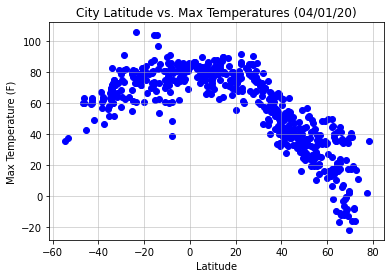

<Figure size 432x288 with 0 Axes>

In [24]:
#5.1.12
#5.2.1
#Temperature (F) vs. Latitude Scatter plot
x_values = city_weather_df["Lat"]
y_values = city_weather_df["Max Temp"]

# Set textual properties
plt.title("City Latitude vs. Max Temperatures (04/01/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

#style
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.scatter(x_values, y_values, marker="o", color="blue")

#print
plt.show() 

#save
plt.savefig("../Images/city_lat_vs_max_temp.png")


## Latitude vs. Humidity Plot

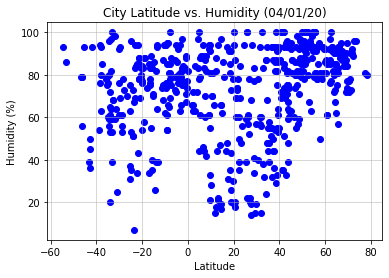

<Figure size 432x288 with 0 Axes>

In [26]:
#5.1.12
#5.2.1
#Latitude vs Humidity Scatter plot
x_values = city_weather_df["Lat"]
y_values = city_weather_df["Humidity"]

# Set textual properties
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

#style
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.scatter(x_values, y_values, marker="o", color="blue")

#print
plt.show() 

#save
plt.savefig("../Images/city_lat_vs_humidity.png")

## Latitude vs. Cloudiness Plot

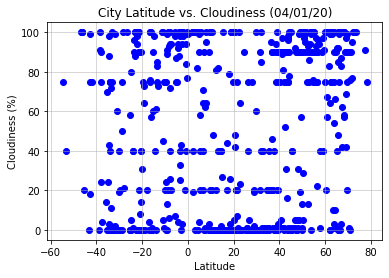

<Figure size 432x288 with 0 Axes>

In [28]:
#5.1.12
#5.2.1
#Latitude vs. Cloudiness Scatter plot
x_values = city_weather_df["Lat"]
y_values = city_weather_df["Cloudiness"]

# Set textual properties
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

#style
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.scatter(x_values, y_values, marker="o", color="blue")

#print
plt.show() 

#save
plt.savefig("../Images/city_lat_vs_cloudiness.png")

## Latitude vs. Wind Speed Plot

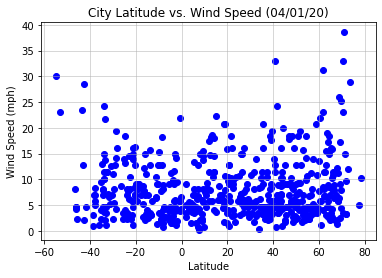

<Figure size 432x288 with 0 Axes>

In [31]:
#5.1.12
#5.2.1
#Temperature (F) vs. Latitude Scatter plot
x_values = city_weather_df["Lat"]
y_values = city_weather_df["Wind Speed"]

# Set textual properties
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

#style
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.scatter(x_values, y_values, marker="o", color="blue")

#print
plt.show() 

#save
plt.savefig("../Images/city_lat_vs_wind_speed.png")

## Linear Regression

In [37]:
#North vs South Hemisphere
#https://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm
# = 0
#create North vs South Hemisphere
#North
north_hemi = city_weather_df.loc[city_weather_df["Lat"] >= 0]

#South
south_hemi =city_weather_df.loc[city_weather_df["Lat"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7795830422911144


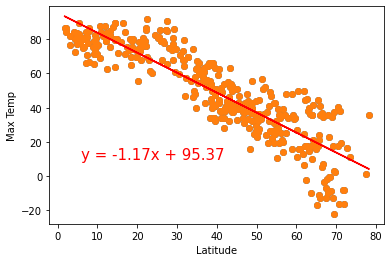

<Figure size 432x288 with 0 Axes>

In [45]:
#5.3.8
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
#plot
x_values = north_hemi["Lat"]
y_values = north_hemi["Max Temp"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

#did not work to change blue :()
#plt.plot(markerfaceolor = "blue")

#plt.show()

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()


#why is it orange??

#save
plt.savefig("../Images/north_hemi_max_temp_vs_lat_linear_regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3031465136575959


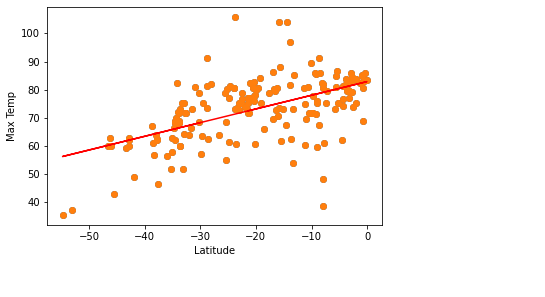

<Figure size 432x288 with 0 Axes>

In [47]:
#5.3.8
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
#plot
x_values = south_hemi["Lat"]
y_values = south_hemi["Max Temp"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

#did not work to change blue :()
#plt.plot(markerfaceolor = "blue")

#plt.show()

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()


#why is it orange??

#save
plt.savefig("../Images/south_hemi_max_temp_vs_lat_linear_regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15729739595761005


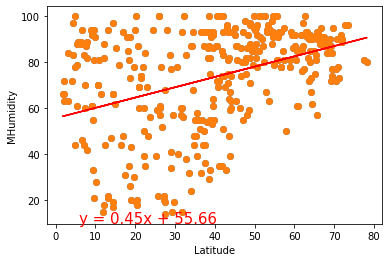

<Figure size 432x288 with 0 Axes>

In [50]:
#5.3.8
#Northern Hemisphere - Humidity vs. Latitude Linear Regression
#plot
x_values = north_hemi["Lat"]
y_values = north_hemi["Humidity"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("MHumidity")

#did not work to change blue :()
#plt.plot(markerfaceolor = "blue")

#plt.show()

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()


#why is it orange??

#save
plt.savefig("../Images/north_hemi_humidity_vs_lat_linear_regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03885197388367086


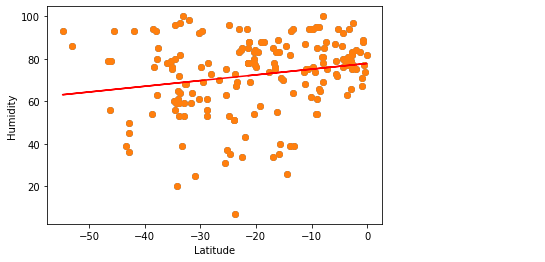

<Figure size 432x288 with 0 Axes>

In [52]:
#5.3.8
#Southern Hemisphere - Humidity vs. Latitude Linear Regression
#plot
x_values = south_hemi["Lat"]
y_values = south_hemi["Humidity"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#did not work to change blue :()
#plt.plot(markerfaceolor = "blue")

#plt.show()

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()


#why is it orange??

#save
plt.savefig("../Images/south_hemi_max_temp_vs_lat_linear_regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11123503445152397


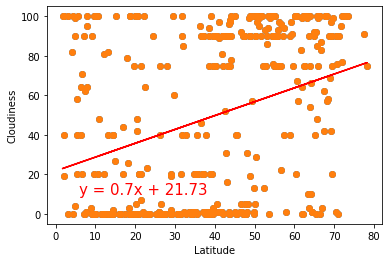

<Figure size 432x288 with 0 Axes>

In [55]:
#5.3.8
#Northern Hemisphere - Cloudiness vs. Latitude Linear Regression
#plot
x_values = north_hemi["Lat"]
y_values = north_hemi["Cloudiness"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#did not work to change blue :()
#plt.plot(markerfaceolor = "blue")

#plt.show()

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()


#why is it orange??

#save
plt.savefig("../Images/north_hemi_cloudiness_vs_lat_linear_regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.028718666097333742


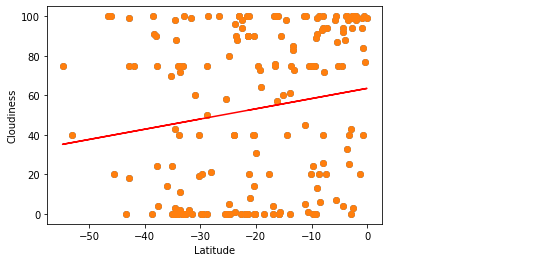

<Figure size 432x288 with 0 Axes>

In [57]:
#5.3.8
#NSouthern Hemisphere - Cloudiness vs. Latitude Linear Regression
#plot
x_values = south_hemi["Lat"]
y_values = south_hemi["Cloudiness"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#did not work to change blue :()
#plt.plot(markerfaceolor = "blue")

#plt.show()

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()


#why is it orange??

#save
plt.savefig("../Images/south_hemi_cloudiness_vs_lat_linear_regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01651227236610486


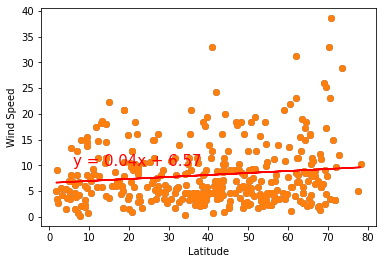

<Figure size 432x288 with 0 Axes>

In [60]:
#5.3.8
#Northern Hemisphere - Wind Speed vs. Latitude Linear Regression
#plot
x_values = north_hemi["Lat"]
y_values = north_hemi["Wind Speed"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#did not work to change blue :()
#plt.plot(markerfaceolor = "blue")

#plt.show()

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()


#why is it orange??

#save
plt.savefig("../Images/north_hemi_wind_speed_vs_lat_linear_regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05774644876178803


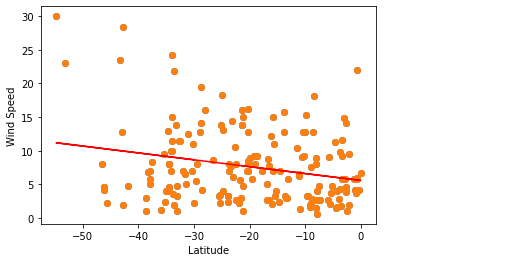

<Figure size 432x288 with 0 Axes>

In [62]:
#5.3.8
#Southern Hemisphere - Wind Speed vs. Latitude Linear Regression
#plot
x_values = south_hemi["Lat"]
y_values = south_hemi["Wind Speed"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#did not work to change blue :()
#plt.plot(markerfaceolor = "blue")

#plt.show()

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()


#why is it orange??

#save
plt.savefig("../Images/south_hemi_wind_speed_vs_lat_linear_regression.png")